## Exploratory Data Analysis on Customer Loans in Finance

In this notebook we look at the `loans_payments.csv` dataset we extracted from the cloud in `db_utils` file. He we 

The main objective is to gain a deeper understanding of the data and identify any patterns which might exist. We will be reviewing the data to identify any issues, such as missing or incorrectly formatted data. Next, we will apply statistical techniques to gain insight on the data's distribution and apply visualisation techniques to identify patterns or trends in the data.

In [1]:
import pandas as pd
from data_frame_info import DataFrameInfo
from data_transform import DataTransform
from data_frame_transform import DataFrameTransform
from data_plot import Plotter

In [2]:
#create instances of each class
info = DataFrameInfo()
trans = DataTransform()
dftf = DataFrameTransform()
plot = Plotter()

In [3]:
df = pd.read_csv('loan_payments.csv') # load data as a dataframe

df_original = df.copy() # save a copy of original dataframe

# df will be used as the working copy of the datframe and copies will be saved as checkpoints for comparison throughout

### Data Exploration

In [4]:
#Exploring the data: print the shape, print list of columns
info.column_list(df, print)
info.shape(df, print)

The DataFrame has column names: ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type'].
The DataFrame has 43 columns and 54231 rows.


Now, using the method defined in **data_frame_info.py**, we want to explore the properties of the columns. The method returns a dataframe with the data type, distinct value list, count of distinct values and counts of null values in the column

In [5]:
info_df = info.column_info_dataframe(df, column = None)
info_df[['Distinct Values', 'Distinct Values Count', 'Data Type', 'Null Values Count']]

,Distinct Values,Distinct Values Count,Data Type,Null Values Count
id,"[38676116, 38656203, 38656154, 38656128, 38656...",54231,int64,0
member_id,"[41461848, 41440010, 41439961, 41439934, 41439...",54231,int64,0
loan_amount,"[8000, 13200, 16000, 15000, 2525, 6675, 26500,...",1083,int64,0
funded_amount,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",1123,float64,3007
funded_amount_inv,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",5261,float64,0
term,"[36 months, nan, 60 months]",3,object,4772
int_rate,"[7.49, 6.99, 14.31, 6.03, 11.44, 21.99, 19.99,...",458,float64,5169
instalment,"[248.82, 407.52, 497.63, 514.93, 456.54, 83.2,...",19940,float64,0
grade,"[A, C, B, E, F, D, G]",7,object,0
sub_grade,"[A4, A3, C4, A1, B4, E5, E3, C2, A5, B3, C1, C...",35,object,0


-----------------------------------------

### Convert columns to the correct format

From the above, we see that some columns aren't in the correct format. These must be corrected to ensure better data quality and prevent errors during analysis and visulaisation.

I have identified 4 transformations that need to be done:

1) Columns that count the number of months since or until an event should be `int` data type. To easily get a list of these columns, notice all these columns have the string `'mths'` in their name.

In [6]:
cols_with_mths = [col for col in info.column_list(df) if 'mths' in col] # get list of columns with 'mths' in their name
info.filter_column_info_dataframe(df, 'Column Name', cols_with_mths) # filter the info_df to display properties of these columns

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
inq_last_6mths,inq_last_6mths,"[1, 0, 2, 6, 3, 4, 5, 8, 7, 9, 10, 11, 15, 12,...",24,int64,0
mths_since_last_delinq,mths_since_last_delinq,"[5.0, nan, 69.0, 74.0, 37.0, 8.0, 43.0, 35.0, ...",101,float64,31002
mths_since_last_record,mths_since_last_record,"[nan, 113.0, 69.0, 64.0, 114.0, 67.0, 38.0, 96...",121,float64,48050
collections_12_mths_ex_med,collections_12_mths_ex_med,"[0.0, 1.0, 2.0, 3.0, 4.0, nan]",6,float64,51
mths_since_last_major_derog,mths_since_last_major_derog,"[5.0, nan, 43.0, 75.0, 58.0, 38.0, 31.0, 66.0,...",114,float64,46732


In [7]:
cols_for_convert_int = cols_with_mths.copy() # create list of columns to convert to int type for use later
cols_for_convert_int.remove('inq_last_6mths') # remove this column name as it is already in the correct format

cols_for_convert_int # display list

['mths_since_last_delinq',
 'mths_since_last_record',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog']

2) Dates are not in the correct format. From inspecting the values in these columns, they only have MM-YYYY format, so must be converted to date `period[M]`. We can use the same trick as preivously where we search for columns with the string `'date'` in them, with the addition of `'earliest_credit_line'` column.

In [8]:
cols_with_date = [col for col in info.column_list(df) if 'date' in col] # # get list of columns with 'date' in their name
cols_with_date.append('earliest_credit_line') # from inpection, this column should be datetype. So we append to this list

info.filter_column_info_dataframe(df, 'Column Name', cols_with_date) # filter the info_df to display properties of these columns

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
issue_date,issue_date,"[Jan-2021, Dec-2019, Nov-2019, Oct-2019, Sep-2...",61,object,0
earliest_credit_line,earliest_credit_line,"[Oct-1987, Sep-2001, Sep-1998, Jun-2008, Apr-2...",587,object,0
last_payment_date,last_payment_date,"[Jan-2022, Oct-2021, Jun-2021, Mar-2021, Aug-2...",99,object,73
next_payment_date,next_payment_date,"[Feb-2022, nan, Jan-2022, Jun-2019, Apr-2018, ...",97,object,32608
last_credit_pull_date,last_credit_pull_date,"[Jan-2022, Oct-2021, Jun-2021, Mar-2021, Nov-2...",102,object,7


In [9]:
# we see all of the above are in the wrong format

cols_for_convert_date = cols_with_date.copy() # create list of columns to convert to date period

cols_for_convert_date # display list

['issue_date',
 'last_payment_date',
 'next_payment_date',
 'last_credit_pull_date',
 'earliest_credit_line']

3) Some object data type columns would be better suited to `category` type as they have a small number of distinct values that they can take. To find these columns, we filter our `info_df` for columns with a low number of distinct values to inspect.

In [10]:
remove_list = cols_for_convert_int + cols_for_convert_date # get list of columns we are already converting
new_col_list = [x for x in info.column_list(df) if not x in remove_list]

filtered_info_df = info.filter_column_info_dataframe(df, 'Column Name', new_col_list) # filter out the columns from info_df

low_distinct_count_df = filtered_info_df[filtered_info_df['Distinct Values Count'] < 100] # display only rows with small number of distinct values
low_distinct_count_df 

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
term,term,"[36 months, nan, 60 months]",3,object,4772
grade,grade,"[A, C, B, E, F, D, G]",7,object,0
sub_grade,sub_grade,"[A4, A3, C4, A1, B4, E5, E3, C2, A5, B3, C1, C...",35,object,0
employment_length,employment_length,"[5 years, 9 years, 8 years, 1 year, 10+ years,...",12,object,2118
home_ownership,home_ownership,"[MORTGAGE, RENT, OWN, OTHER, NONE]",5,object,0
verification_status,verification_status,"[Not Verified, Source Verified, Verified]",3,object,0
loan_status,loan_status,"[Current, Fully Paid, Charged Off, Late (31-12...",9,object,0
payment_plan,payment_plan,"[n, y]",2,object,0
purpose,purpose,"[credit_card, debt_consolidation, home_improve...",14,object,0
delinq_2yrs,delinq_2yrs,"[2, 0, 1, 3, 7, 9, 5, 4, 6, 10, 17, 8, 15, 11,...",16,int64,0


- This gives us 15 results. The `int` type rows should remain as `int` as it is numerical count data. Except for `'policy_code'` column, which we know from the *loans_dataset_schema.md* that it can only take values policy_code = {1,2}. Everything else needs to be converted to `category` type.

In [11]:
all_cols = low_distinct_count_df.index.tolist() # list of column names in the above dataframe

keep_int_types = low_distinct_count_df[low_distinct_count_df['Data Type'] == 'int64'].index.tolist() # list of column names that are int and should stay int

cols_for_convert_categ = [x for x in all_cols if not x in keep_int_types] # create list of columns to convert to category type
cols_for_convert_categ.append('policy_code') # add 'policy_code' to list to convert to category

cols_for_convert_categ # display list

['term',
 'grade',
 'sub_grade',
 'employment_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'application_type',
 'policy_code']

In [12]:
#check to view all distinct values in the columns in cols_for_convert_categ to sense check
for item in cols_for_convert_categ:
    print(item,info.filter_column_info_dataframe(df, 'Column Name', cols_for_convert_categ).loc[item, 'Distinct Values'])

term ['36 months' nan '60 months']
grade ['A' 'C' 'B' 'E' 'F' 'D' 'G']
sub_grade ['A4' 'A3' 'C4' 'A1' 'B4' 'E5' 'E3' 'C2' 'A5' 'B3' 'C1' 'C3' 'F1' 'D2'
 'F4' 'B2' 'D1' 'E2' 'A2' 'D3' 'D4' 'E1' 'B1' 'D5' 'C5' 'B5' 'G1' 'G3'
 'F2' 'E4' 'F5' 'G2' 'F3' 'G4' 'G5']
employment_length ['5 years' '9 years' '8 years' '1 year' '10+ years' '< 1 year' nan
 '7 years' '3 years' '4 years' '6 years' '2 years']
home_ownership ['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
verification_status ['Not Verified' 'Source Verified' 'Verified']
loan_status ['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
payment_plan ['n' 'y']
purpose ['credit_card' 'debt_consolidation' 'home_improvement' 'small_business'
 'renewable_energy' 'major_purchase' 'other' 'moving' 'car' 'medical'
 'house' 'vacation' 'wedding' 'educational']
application_type ['INDIVIDUAL']
p

4) Finally, `'id'` and `'member_id'` columns have no numerical value so should be converted to `object` data type.

In [13]:
cols_for_convert_str = ['id', 'member_id'] # create list of columns to convert to object type

We now have 4 lists of column names that need to be converted:
- cols_for_convert_categ
- cols_for_convert_date
- cols_for_convert_int
- cols_for_convert_str

Convert columns to the correct format using method defined in *data_transform.py*

In [14]:
for column in cols_for_convert_categ:
    trans.convert_to_category(df, column)

for column in cols_for_convert_int:
    trans.convert_to_integer(df, column)

for column in cols_for_convert_date:
    trans.convert_to_timeperiod(df, column)

for column in cols_for_convert_str:
    trans.convert_to_string(df, column)

c:\Users\Nadia\Documents\10. Courses\AI Core\exploratory-data-analysis---customer-loans-in-finance489\data_transform.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe[column_name] = pd.to_datetime(dataframe[column_name], errors='coerce')
c:\Users\Nadia\Documents\10. Courses\AI Core\exploratory-data-analysis---customer-loans-in-finance489\data_transform.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe[column_name] = pd.to_datetime(dataframe[column_name], errors='coerce')
c:\Users\Nadia\Documents\10. Courses\AI Core\exploratory-data-analysis---customer-loans-in-finance489\data_transform.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back

In [15]:
info.column_info_dataframe(df, column = None) # check info_df to see if data types are all as expected after changes

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
id,id,"[38676116, 38656203, 38656154, 38656128, 38656...",54231,object,0
member_id,member_id,"[41461848, 41440010, 41439961, 41439934, 41439...",54231,object,0
loan_amount,loan_amount,"[8000, 13200, 16000, 15000, 2525, 6675, 26500,...",1083,int64,0
funded_amount,funded_amount,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",1123,float64,3007
funded_amount_inv,funded_amount_inv,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",5261,float64,0
term,term,"['36 months', NaN, '60 months'] Categories (2,...",3,category,4772
int_rate,int_rate,"[7.49, 6.99, 14.31, 6.03, 11.44, 21.99, 19.99,...",458,float64,5169
instalment,instalment,"[248.82, 407.52, 497.63, 514.93, 456.54, 83.2,...",19940,float64,0
grade,grade,"['A', 'C', 'B', 'E', 'F', 'D', 'G'] Categories...",7,category,0
sub_grade,sub_grade,"['A4', 'A3', 'C4', 'A1', 'B4', ..., 'F5', 'G2'...",35,category,0


In [16]:
df_type_converted = df.copy() # save a copy of this tranformed dataframe

----------------------

### Remove or impute missing values in the data

An important EDA task is to impute or remove missing values from the dataset. Missing values can occur due to a variety of reasons such as data entry errors or incomplete information.

Fist we inspect to see which columns contain null values.

If the percentage of missing data is relatively small, you may choose to impute the missing values using statistical methods such as mean or median imputation. Alternatively, if the percentage of missing data is large or if the missing data is not missing at random, you may choose to remove the variables or rows with missing data entirely.

In [17]:
null_percentages = info.get_null_percentage(df) # use method to get percentages of null values for each column
null_percentages[null_percentages['Null Values %'] > 0] # filter to only show columns with null values

,Column Name,Null Values %
0,mths_since_last_record,88.60
1,mths_since_last_major_derog,86.17
2,next_payment_date,60.13
3,mths_since_last_delinq,57.17
4,int_rate,9.53
5,term,8.80
6,funded_amount,5.54
7,employment_length,3.91
8,last_payment_date,0.13
9,collections_12_mths_ex_med,0.09


<Axes: >

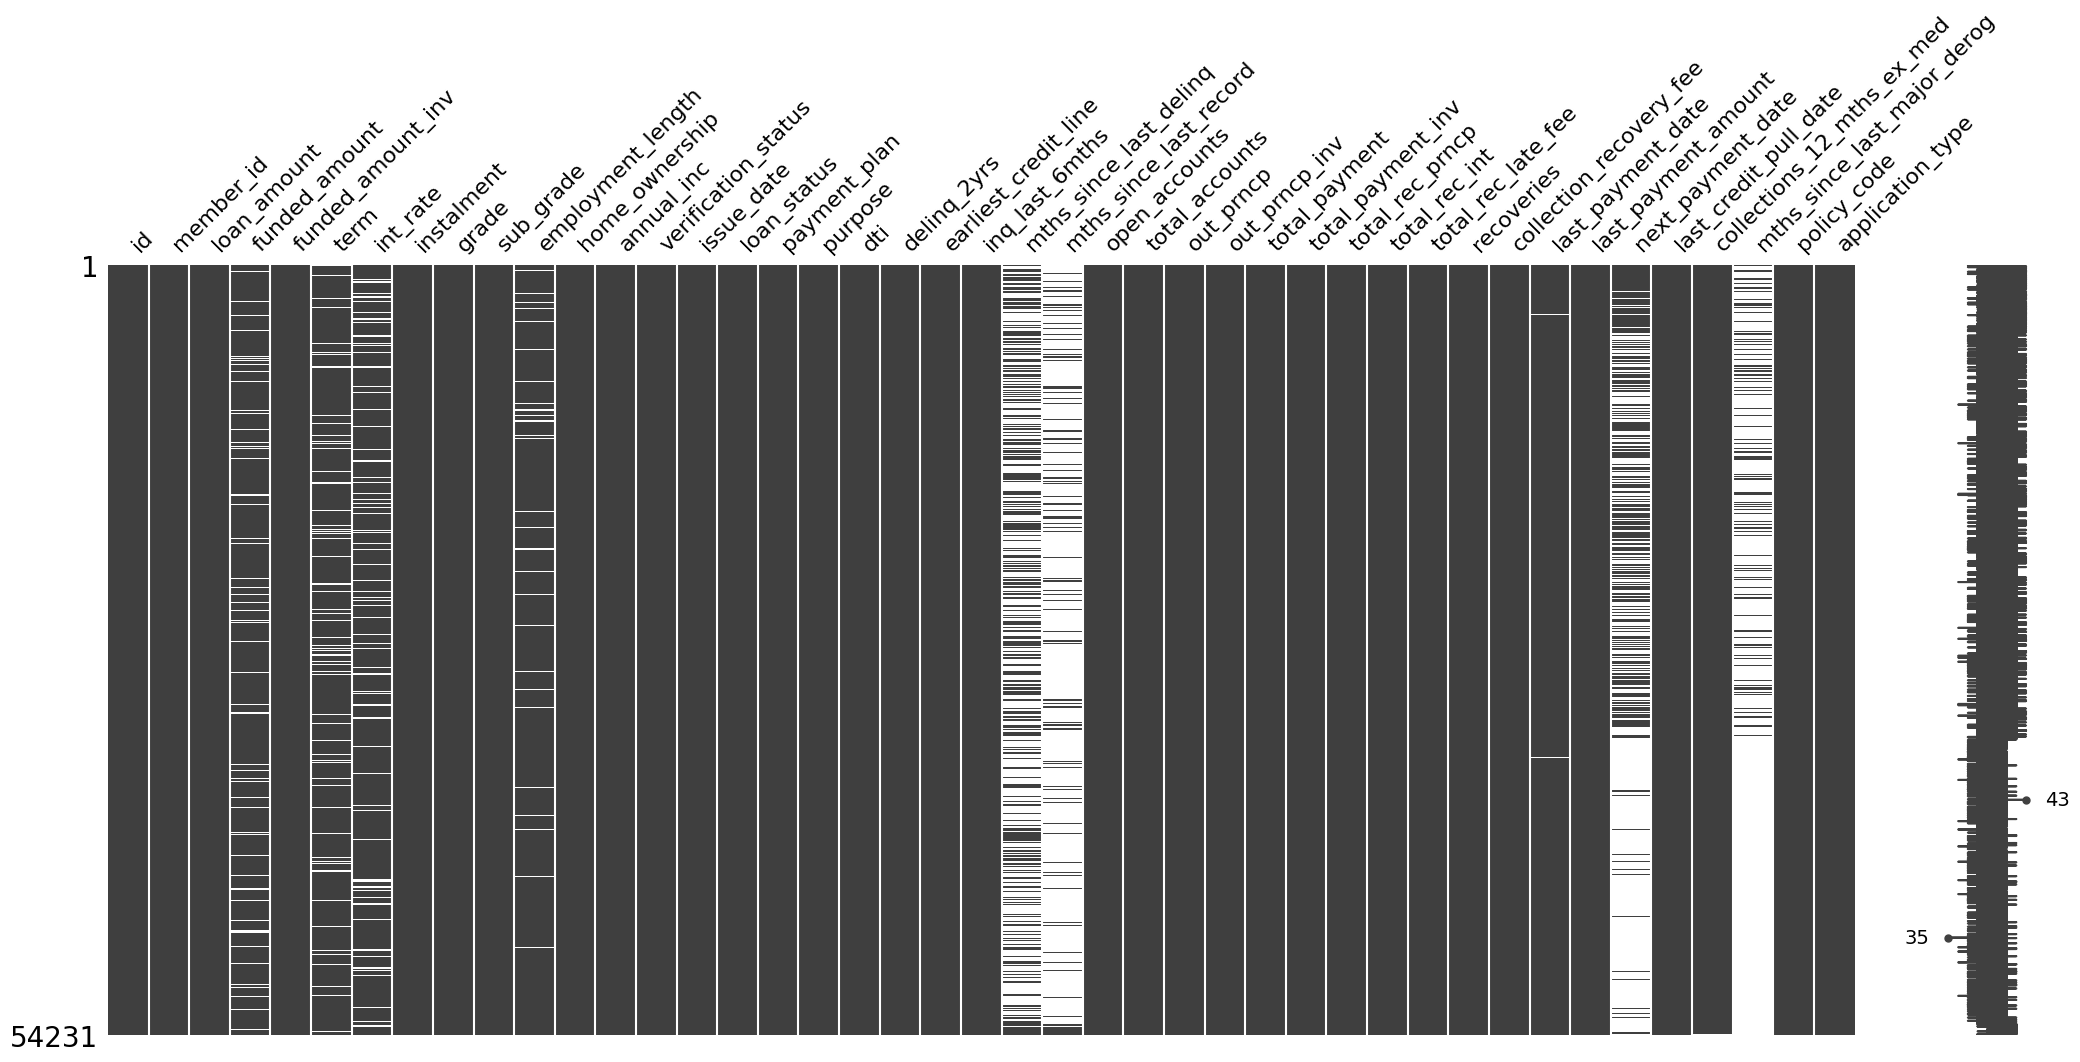

In [18]:
plot.missing_matrix(df) # display missing matrix to show that data is missing at random

-  We have 4 columns with a large percentage (>50%) of null values so we will drop these columns. It does not make sense to impute here or drop the records as we will be losing a large amount of data

In [19]:
col_to_drop = null_percentages[null_percentages['Null Values %'] > 50]['Column Name'] # get list columns with large % of nulls. Display as pandas series

for col in col_to_drop:
    dftf.remove_null_columns(df, col) # remove these columns from df

- There are 3 columns with a very small percentage (<1%) of null values. Given this is only a small subset of our dataset, best option is to drop those records with missing values

In [20]:
row_to_drop = null_percentages[null_percentages['Null Values %'] < 1]['Column Name'] # get list columns with small % of nulls. Display as pandas series

for row in row_to_drop:
    dftf.remove_null_rows(df, row) # remove these columns from df

Check to see what difference removing these columns and rows has made to the shape of our dataframe. A small percentage of dataloss is okay for these purposes

In [21]:
og_rows = info.shape(df_original)[0]
og_cols = info.shape(df_original)[1]
new_rows = info.shape(df)[0]
new_cols = info.shape(df)[1]
rows_lost = ((og_rows - new_rows) / og_rows )*100
cols_lost = ((og_cols - new_cols) / og_cols )*100

print(f'Transformed df shape: {info.shape(df)}')
print(f'Original df shape: {info.shape(df_original)}')
print(f'{og_cols - new_cols} columns dropped. That is {round(cols_lost,2)}% of cols lost')
print(f'{info.shape(df_original)[0] - info.shape(df)[0]} rows dropped. That is {round(rows_lost,2)}% of rows lost')

Transformed df shape: (54100, 39)
Original df shape: (54231, 43)
4 columns dropped. That is 9.3% of cols lost
131 rows dropped. That is 0.24% of rows lost


- The remaining columns with null values will have a percenage between 1-10%. We will impute values for these using statistical methods (mode, mean or median imputation)

In [22]:
null_percentages = info.get_null_percentage(df)
display(null_percentages[null_percentages['Null Values %'] > 0]) # get remaining percentages of null values and show only columns with missing values

cols_to_impute = null_percentages[null_percentages['Null Values %'] > 0]['Column Name'] # create list of columns that need null value imputation

,Column Name,Null Values %
0,int_rate,9.54
1,term,8.80
2,funded_amount,5.54
3,employment_length,3.91


Next step is to choose the imputation method. We will use statistical methods to impute the data as the percenage of missing values is still quite low (<10%)

- mean imputation: used for continuous, normally distributed data
- median imputation: used for continuous, skewed data
- mode imputation: used for catagorical data

In [23]:
pd.merge(null_percentages, info.column_info_dataframe(df), on='Column Name').head(4) # display info_df with additional null value percentage

,Column Name,Null Values %,Distinct Values,Distinct Values Count,Data Type,Null Values Count
0,int_rate,9.54,"[7.49, 6.99, 14.31, 6.03, 11.44, 21.99, 19.99,...",456,float64,5159
1,term,8.80,"['36 months', NaN, '60 months'] Categories (2,...",3,category,4762
2,funded_amount,5.54,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",1123,float64,2998
3,employment_length,3.91,"['5 years', '9 years', '8 years', '1 year', '1...",12,category,2114


- `'term'` and `'employment_length'` columns are categorical so will use mode imputation

Next we need to check the skew of the distribution of columns `'funded_amount'` and `'int_rate'` to determine whether to use mean or median imputation.

In [24]:
print('int_rate skew:',df['int_rate'].skew())
print('funded_amount skew:',df['funded_amount'].skew())

int_rate skew: 0.411540039874641
funded_amount skew: 0.8208113751273644


Using a skew threshold of 0.5:
- `int_rate` column is normally distributed and will use mean imputaiton
- `funded_amount` is positively skewed and will use median imputation

In [25]:
#imputations
dftf.impute_med(df, 'funded_amount')
dftf.impute_mean(df, 'int_rate')
dftf.impute_mode(df, 'employment_length')
dftf.impute_mode(df, 'term')

info.get_null_percentage(df) # display null percentages to check no null values

,Column Name,Null Values %
0,id,0.0
1,member_id,0.0
2,loan_amount,0.0
3,funded_amount,0.0
4,funded_amount_inv,0.0
5,term,0.0
6,int_rate,0.0
7,instalment,0.0
8,grade,0.0
9,sub_grade,0.0


In [26]:
df_null_imputed = df.copy() # save a copy of this tranformed dataframe

---------------------

### Analyse and transform skewed columns

Skewed data can lead to biased models and inaccurate results, so it's important to address this issue before proceeding with any analysis.


- Step 1: Firstly you will need to identify the skewed columns in the data. This can be done using standard Pandas methods. You then need to determine a threshold for the skewness of the data, over which a column will be considered skewed. You should also visualise the data using your Plotter class to analyse the skew.


- Step 2: Once the skewed columns are identified, you should perform transformations on these columns to determine which transformation results in the biggest reduction in skew. Create the the method to transform the columns in your DateFrameTransform class.


- Step 3: Apply the identified transformations to the columns to reduce their skewness.


- Step 4: Visualise the data to check the results of the transformation have improved the skewness of the data.


- Step 5: At this point you may want to save a separate copy of your DataFrame to compare your results.

In [27]:
numeric_cols = info.numeric_columns(df) #to get skew, need to identify numeric columns as skew does not apply to categorical data.

skewed_col_dict = info.get_skewed_columns(df, numeric_cols, 0.5) # create dictionary skewed columns (threshold of 0.5)
skewed_col_dict # display dictionary

{'loan_amount': 0.8,
 'funded_amount': 0.87,
 'funded_amount_inv': 0.81,
 'instalment': 1.0,
 'annual_inc': 8.74,
 'delinq_2yrs': 5.32,
 'inq_last_6mths': 3.24,
 'open_accounts': 1.06,
 'total_accounts': 0.78,
 'out_prncp': 2.35,
 'out_prncp_inv': 2.35,
 'total_payment': 1.27,
 'total_payment_inv': 1.26,
 'total_rec_prncp': 1.26,
 'total_rec_int': 2.2,
 'total_rec_late_fee': 13.26,
 'recoveries': 14.38,
 'collection_recovery_fee': 27.79,
 'last_payment_amount': 2.5,
 'collections_12_mths_ex_med': 20.3}

Now we perform transformations on these columns to determine which transformation results in the biggest reduction in skew. We will be comparing **log transformation** and **yeo-johnson transformation**. For our purposes here, we will not test the box-cox transformation as it will provide the same result as the yeo-johnson, except it cannot be applied to columns containing zero or negative values (and several columns in our data have values of 0).

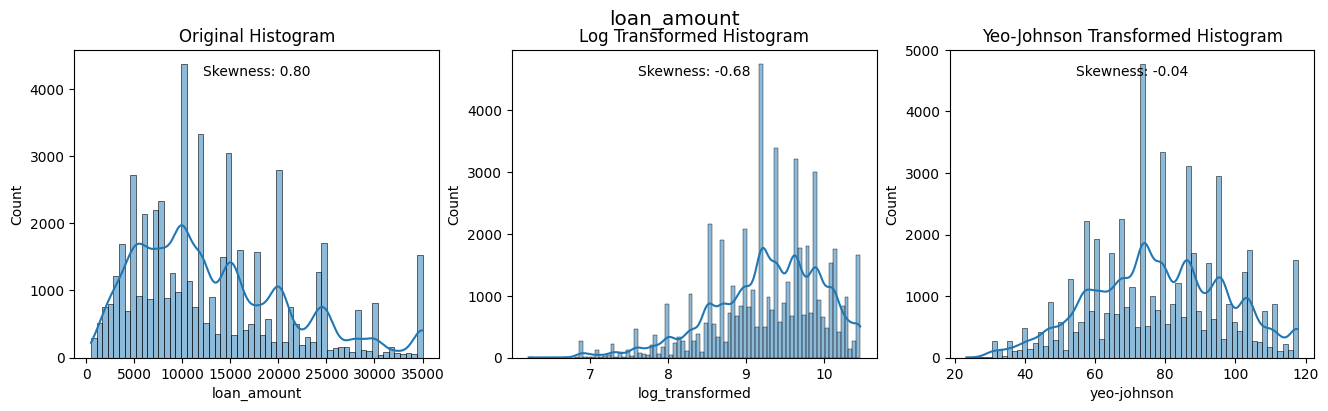

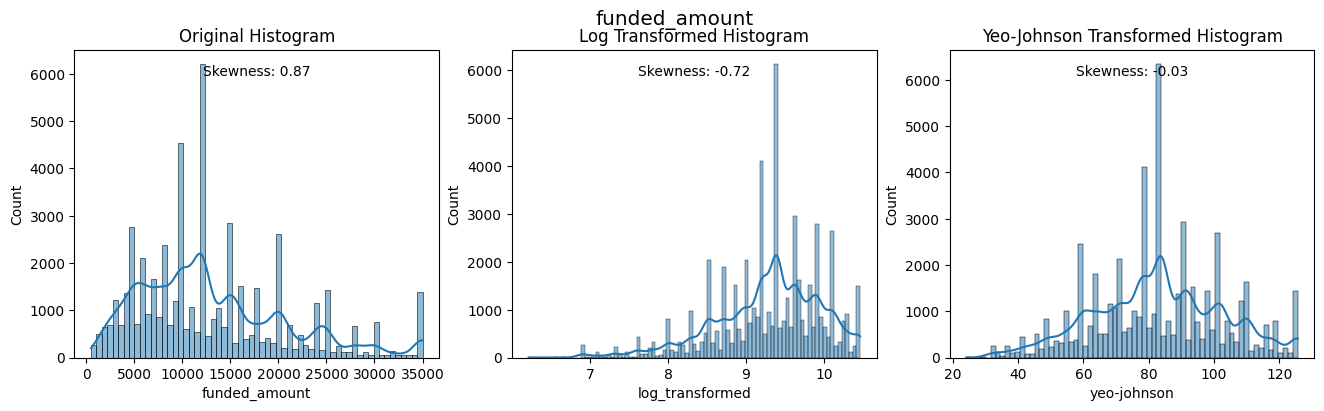

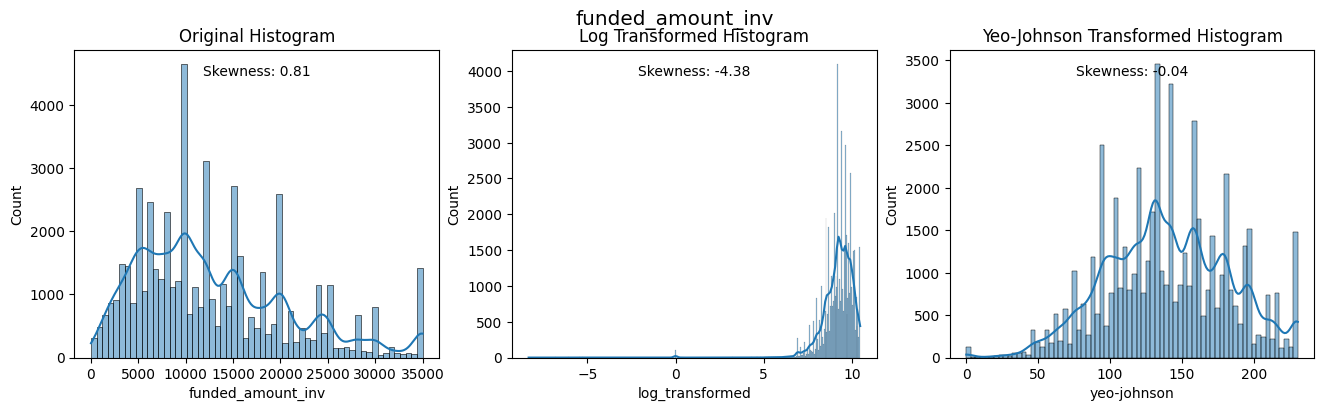

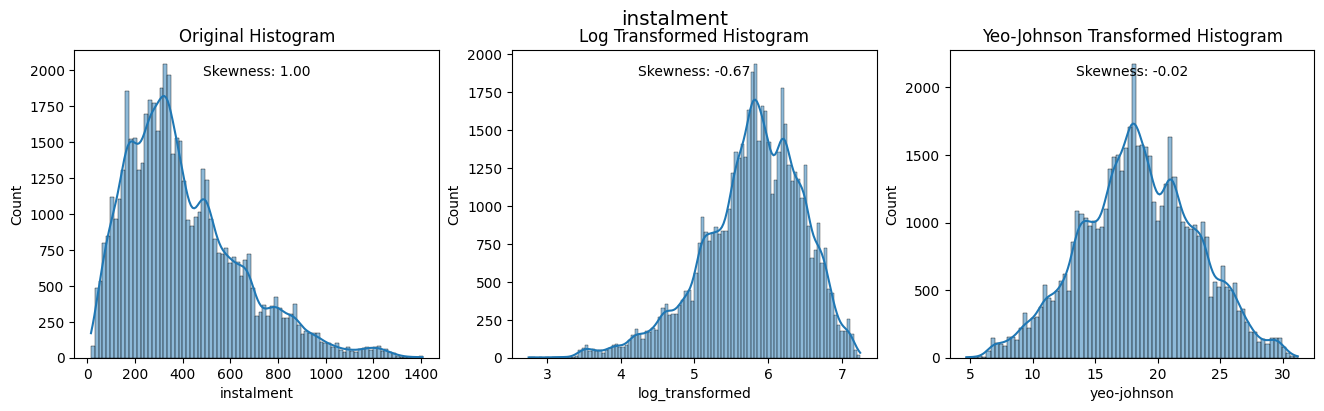

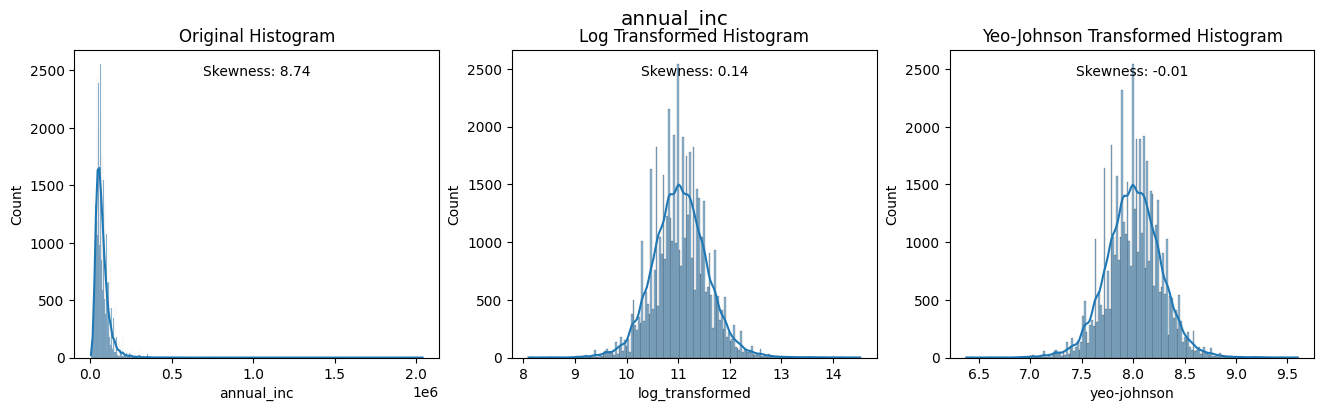

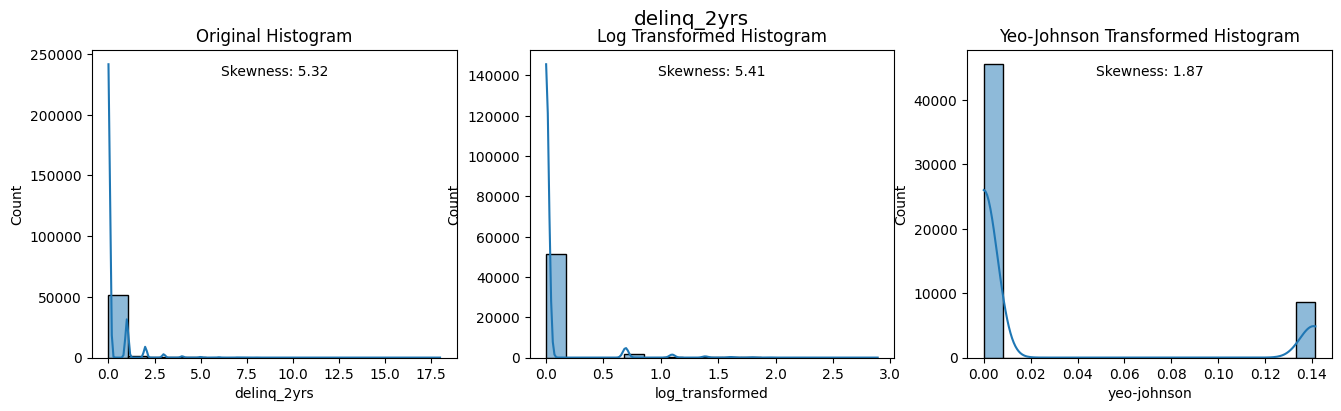

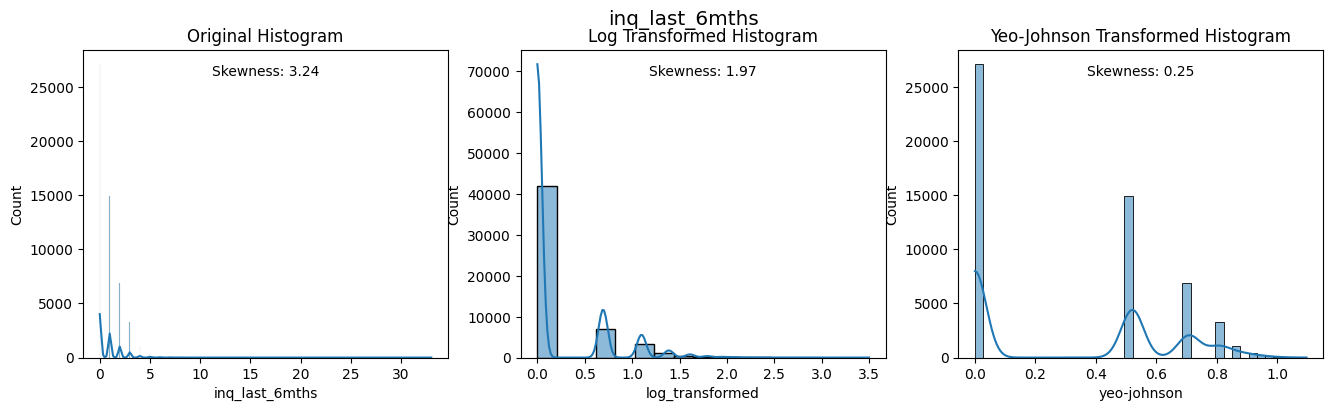

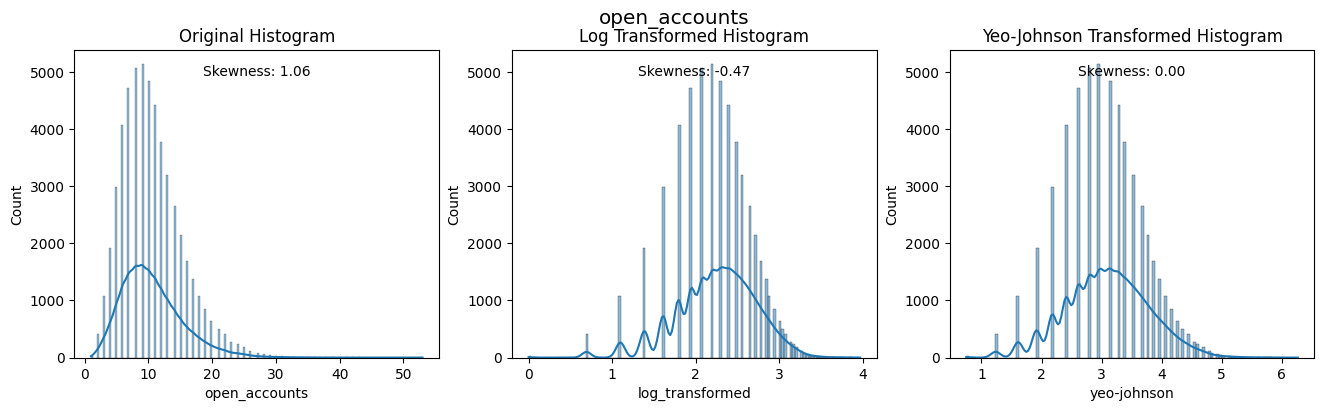

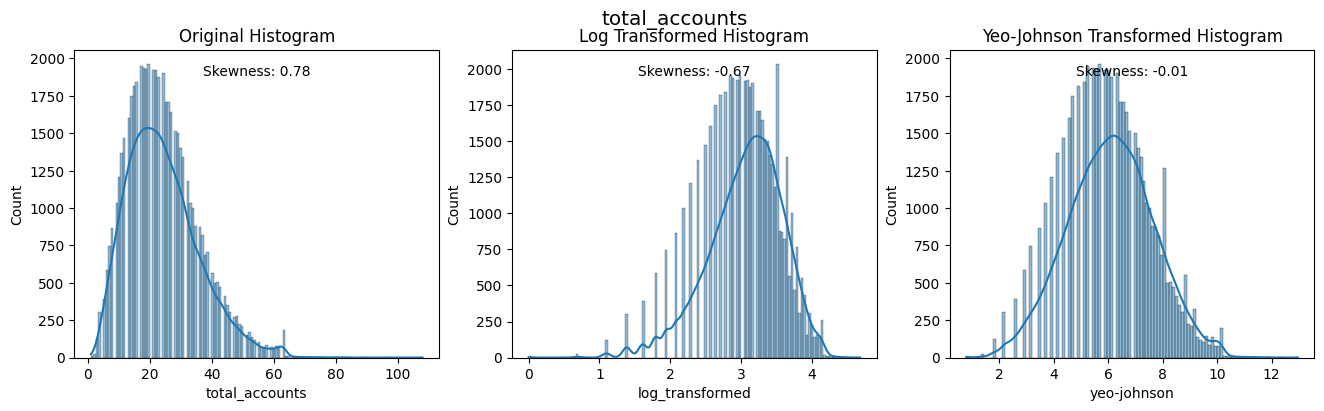

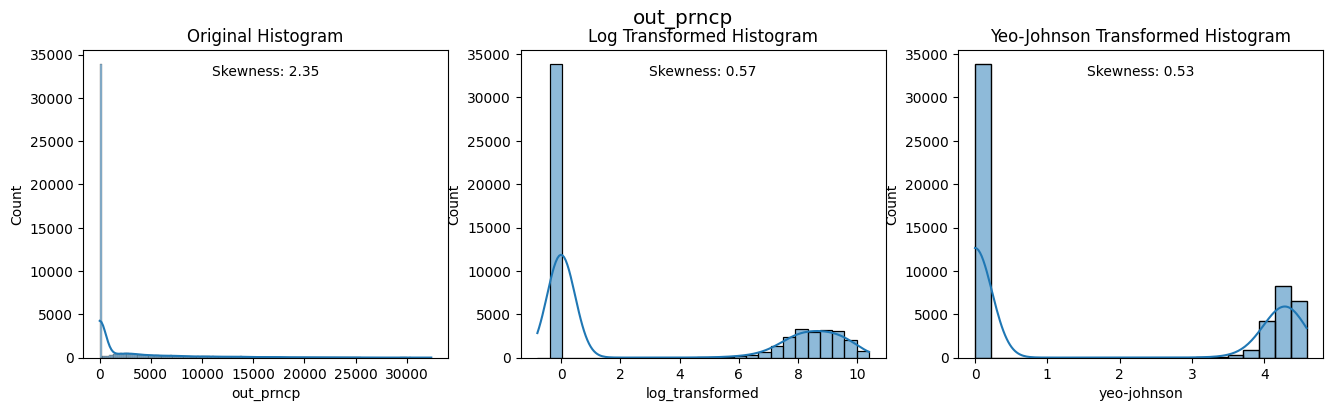

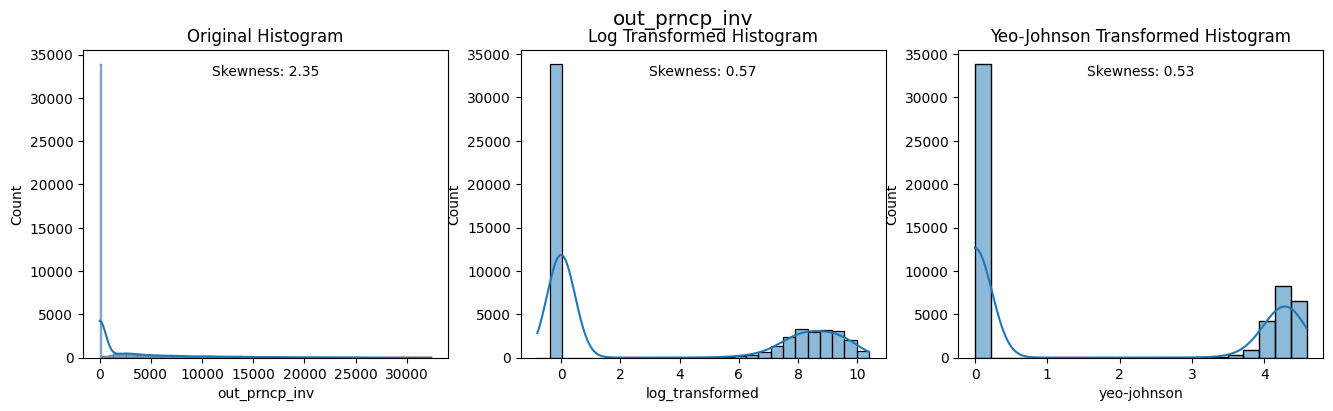

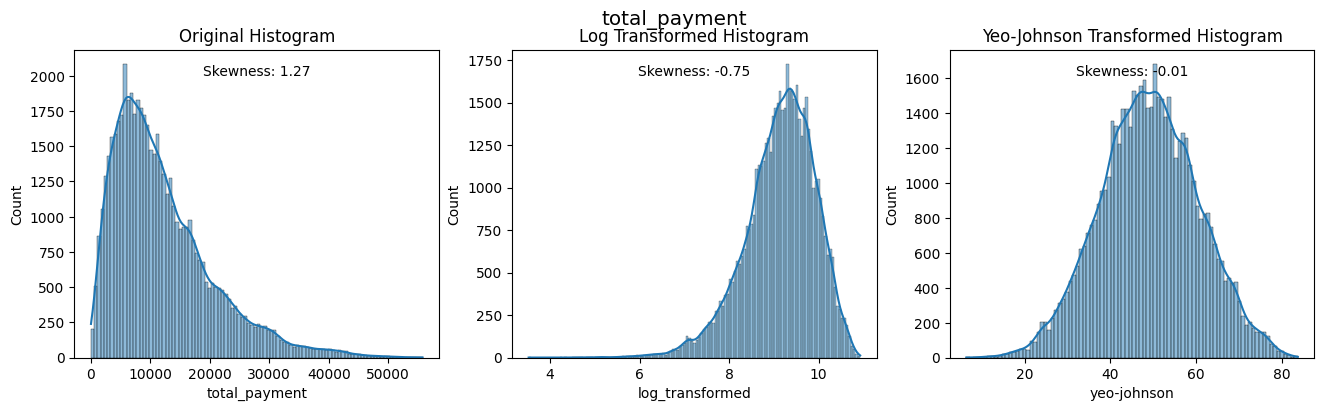

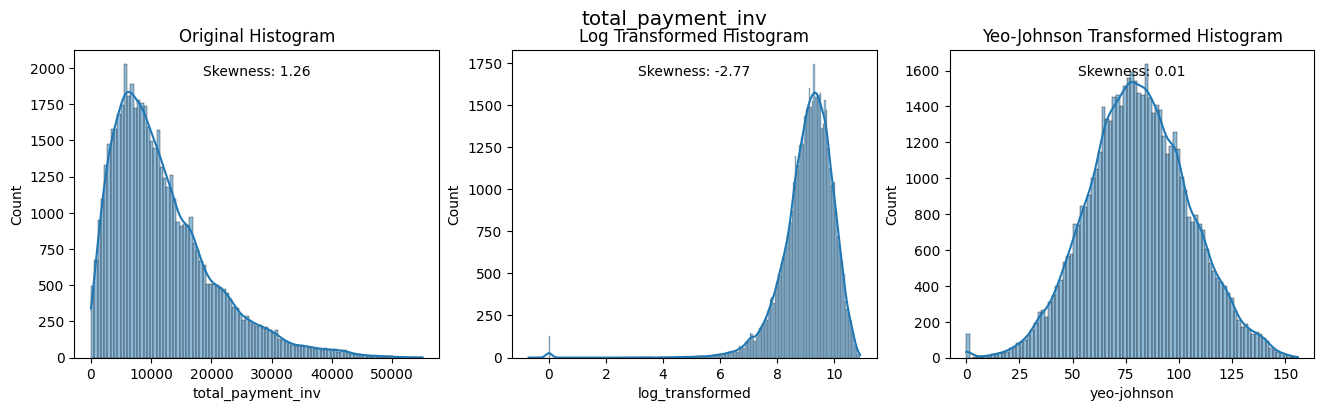

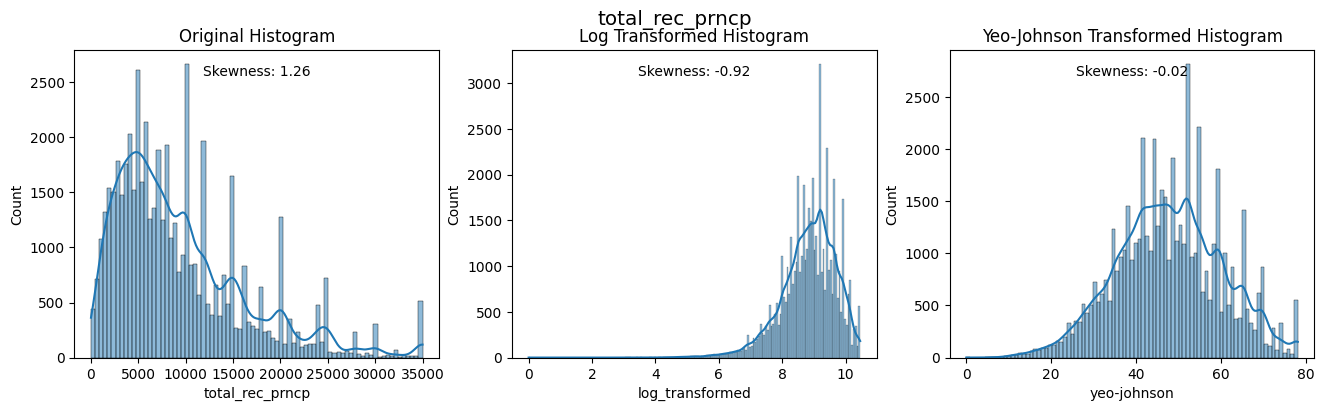

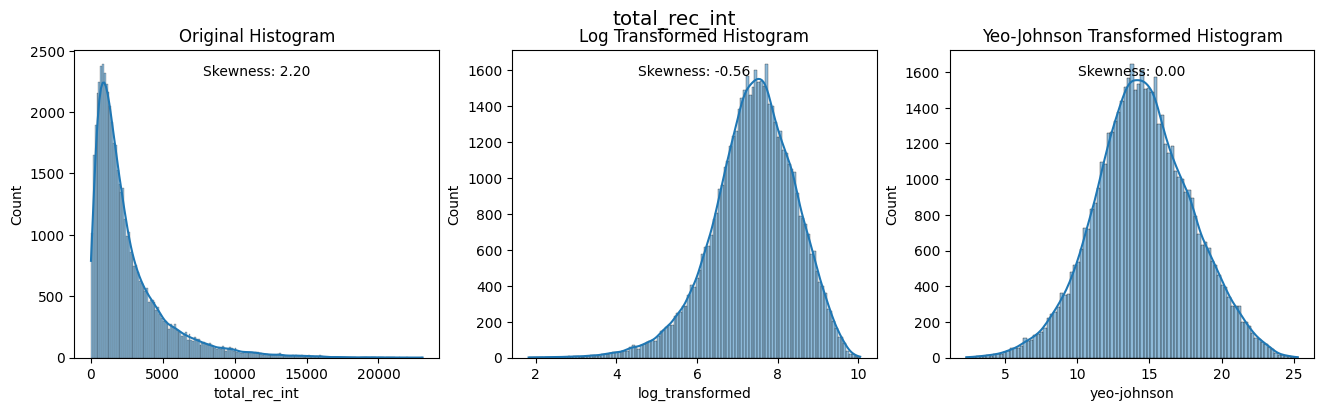

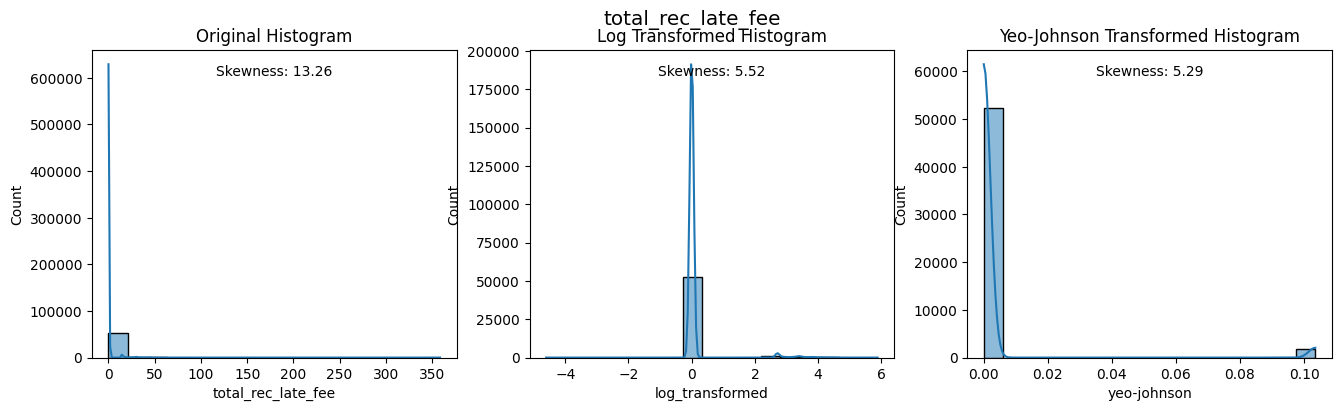

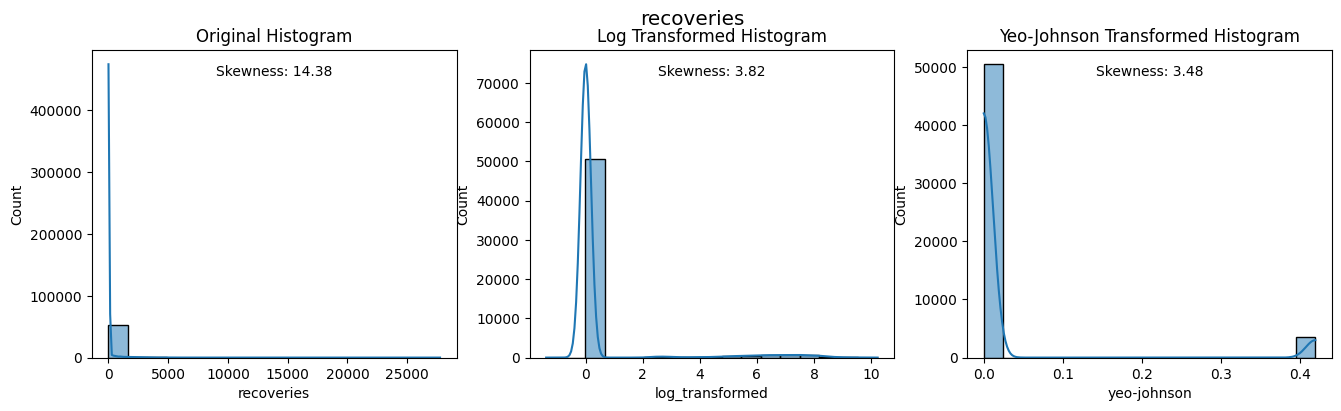

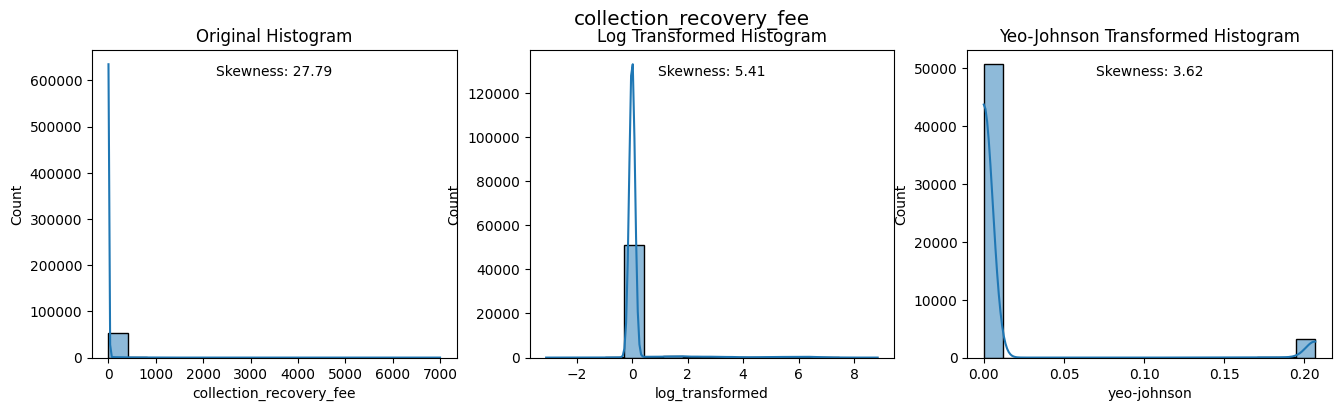

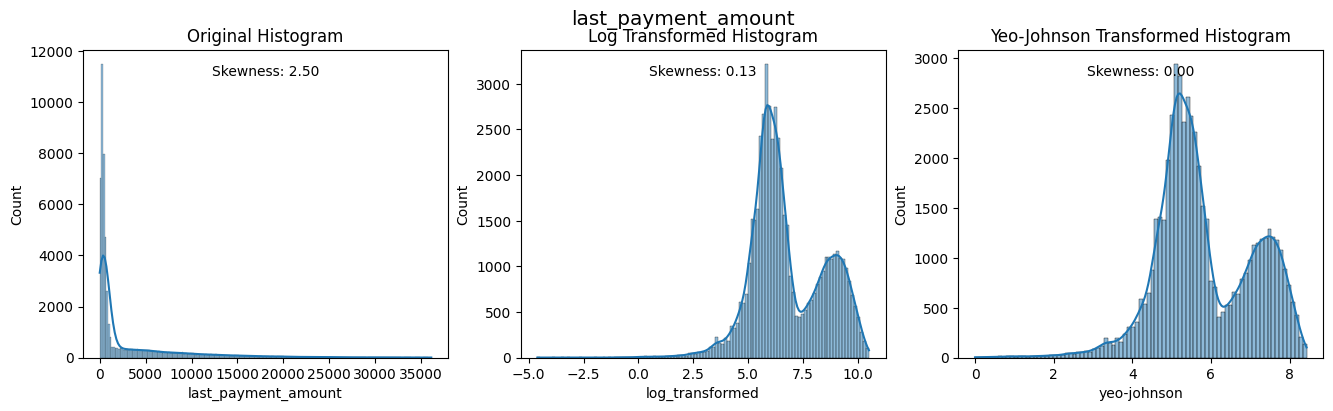

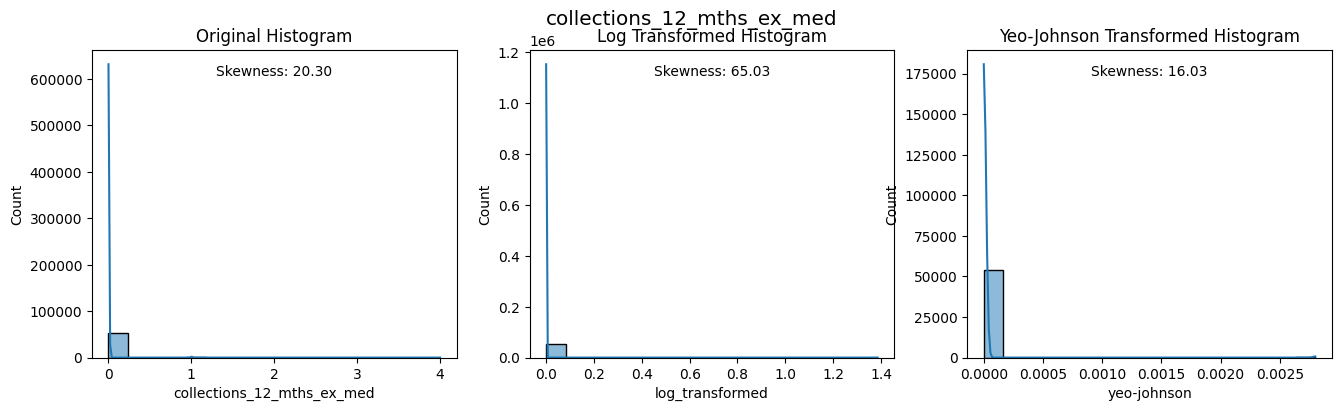

In [28]:
skewed_cols = [key for key in skewed_col_dict] # get list of skewed columns from the dictionary

for col in skewed_cols: 
    try:
        plot.compare_skewness_transformations(df, col) # print transformation comparison histograms for each skewed column
    except:
        print(f'error found for {col}')

As you can see above, **Yeo-Johnson transformation** provides a better skewness correction all columns.

For some columns, the skewness is still high even after transformation. For these columns, we will ommit transforming them:
- `delinq_2yrs`
- `inq_last_6mths`
- `out_prncp`
- `out_prncp_inv`
- `total_rec_late_fee`
- `recoveries`
- `collection_recovery_fee`
- `collections_12_mths_ex_med`

In [29]:
dont_skew_correct = ['delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med'] # list for columns that are not being tranformed

skew_correct = [item for item in skewed_cols if item not in dont_skew_correct] # list of skewed columns that will be tranformed

skew_correct # show list

['loan_amount',
 'funded_amount',
 'funded_amount_inv',
 'instalment',
 'annual_inc',
 'open_accounts',
 'total_accounts',
 'total_payment',
 'total_payment_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_payment_amount']

Now we perform the skewness correction on the identified columns using either the Box-Cox or Yeo-Johnson transformations.

Box-Cox is preferred where possible becuase, although it can only be used for data that is strictly positive, it is less computationally taxing to perform.

In [30]:
for col in skew_correct:
    if (df[col] <= 0).values.any() == False: # If column contains only positive values.
        df[col] = dftf.box_cox_transform(df, col).values # perform box-cox transformation
    else: # If column contains non-positive values
        df[col] = dftf.yeo_johnson_transform(df, col).values # perform yeo-johnson transformation

In [31]:
# checks
skewed_col_dict = info.get_skewed_columns(df, skew_correct, 0.5) # check skew of columns after transformation to see that they are all below our skew threshold
skewed_col_dict # will return empty dictionary if no columns are skewed

{}

In [32]:
df_skew_corrected = df.copy() # save a copy of this tranformed dataframe

----------------------

### Remove outliers

Removing outliers from the dataset will improve the quality and accuracy of the analysis as outliers can distort the analysis results. You will need to first identify the outliers and then use a method to remove them.


Step 1: First visualise your data using your Plotter class to determine if the columns contain outliers.


Step 2: Once identified use a method to transform or remove the outliers from the dataset. Build this method in your DataFrameTransform class.


Step 3: With the outliers transformed/removed re-visualise your data with you Plotter class to check that the outliers have been correctly removed.

C:\Users\Nadia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


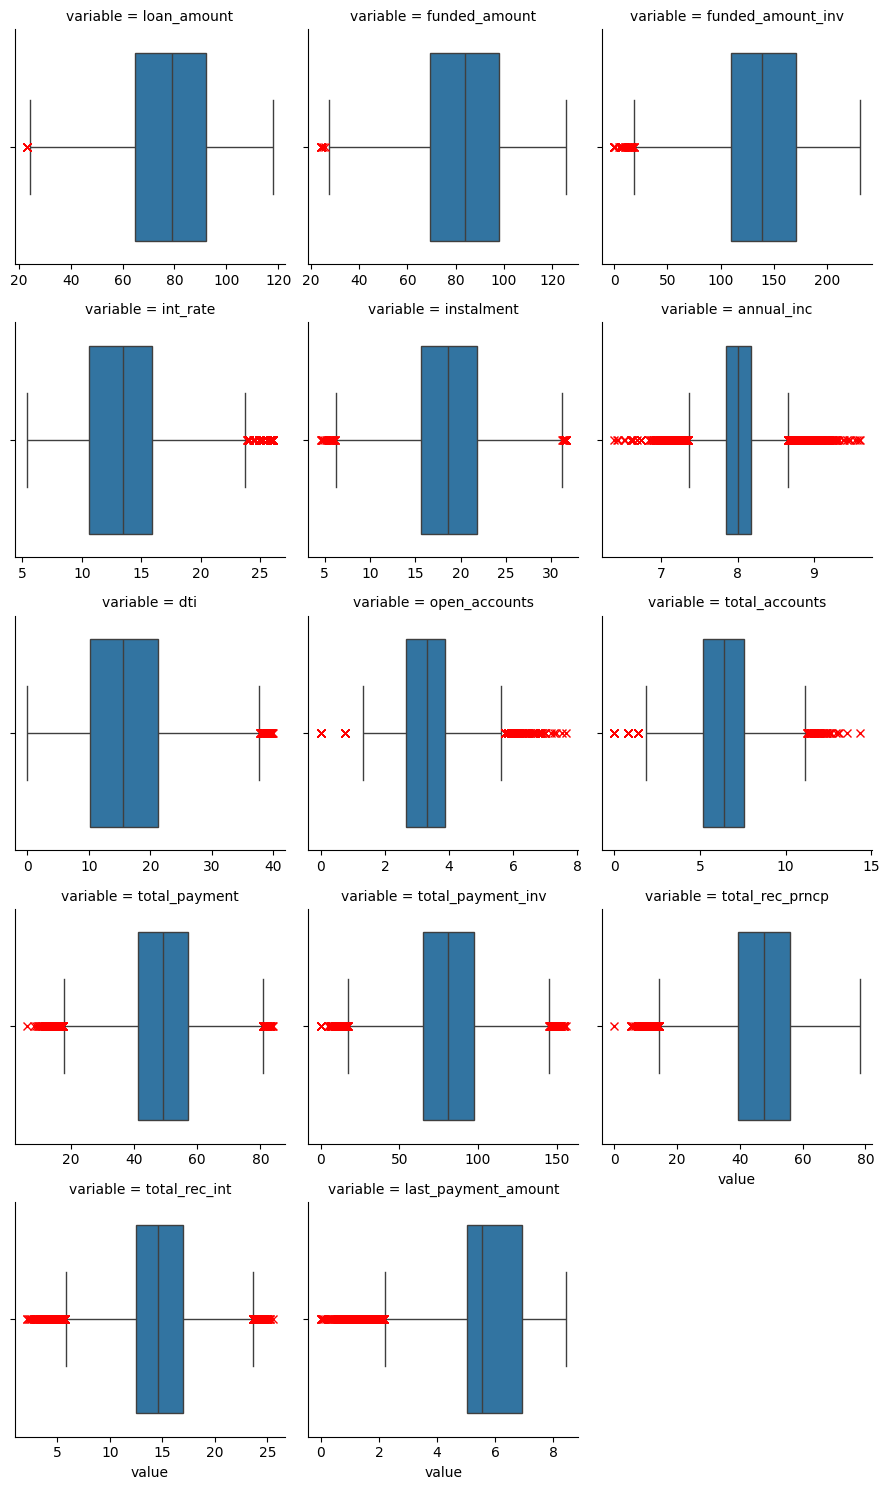

In [33]:
normal_cols = [item for item in numeric_cols if item not in dont_skew_correct] # list of non-skewed numeric columns

plot.facet_grid_box_plot(df, normal_cols) # visualise outliers with boxplot for each column normal_cols

From the above visualisation, we see that every column has some outliers.

The threshold we are using to identify extreme values is z-scores beyond ±3 (about 99.7% of data falls within this range for a normal distribution).

We will remove any records from the data that contain outliers

In [34]:
for col in normal_cols:
    df = dftf.drop_outlier_rows(df, col, 3) # use method to drop rows containing outliers beyond our z-score threshold

Check to see what difference removing these rows has made to the shape of our dataframe.

In [35]:
#compare outlier removal with most recent version of the df
og_rows = info.shape(df_skew_corrected)[0]
og_cols = info.shape(df_skew_corrected)[1]
new_rows = info.shape(df)[0]
new_cols = info.shape(df)[1]
rows_lost = ((og_rows - new_rows) / og_rows )*100
print(f'Transformed df shape: {info.shape(df)}')
print(f'Previous df shape: {info.shape(df_skew_corrected)}')
print(f'{info.shape(df_skew_corrected)[0] - info.shape(df)[0]} rows dropped. That is {round(rows_lost,2)}% of rows lost')

Transformed df shape: (52894, 39)
Previous df shape: (54100, 39)
1206 rows dropped. That is 2.23% of rows lost


C:\Users\Nadia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


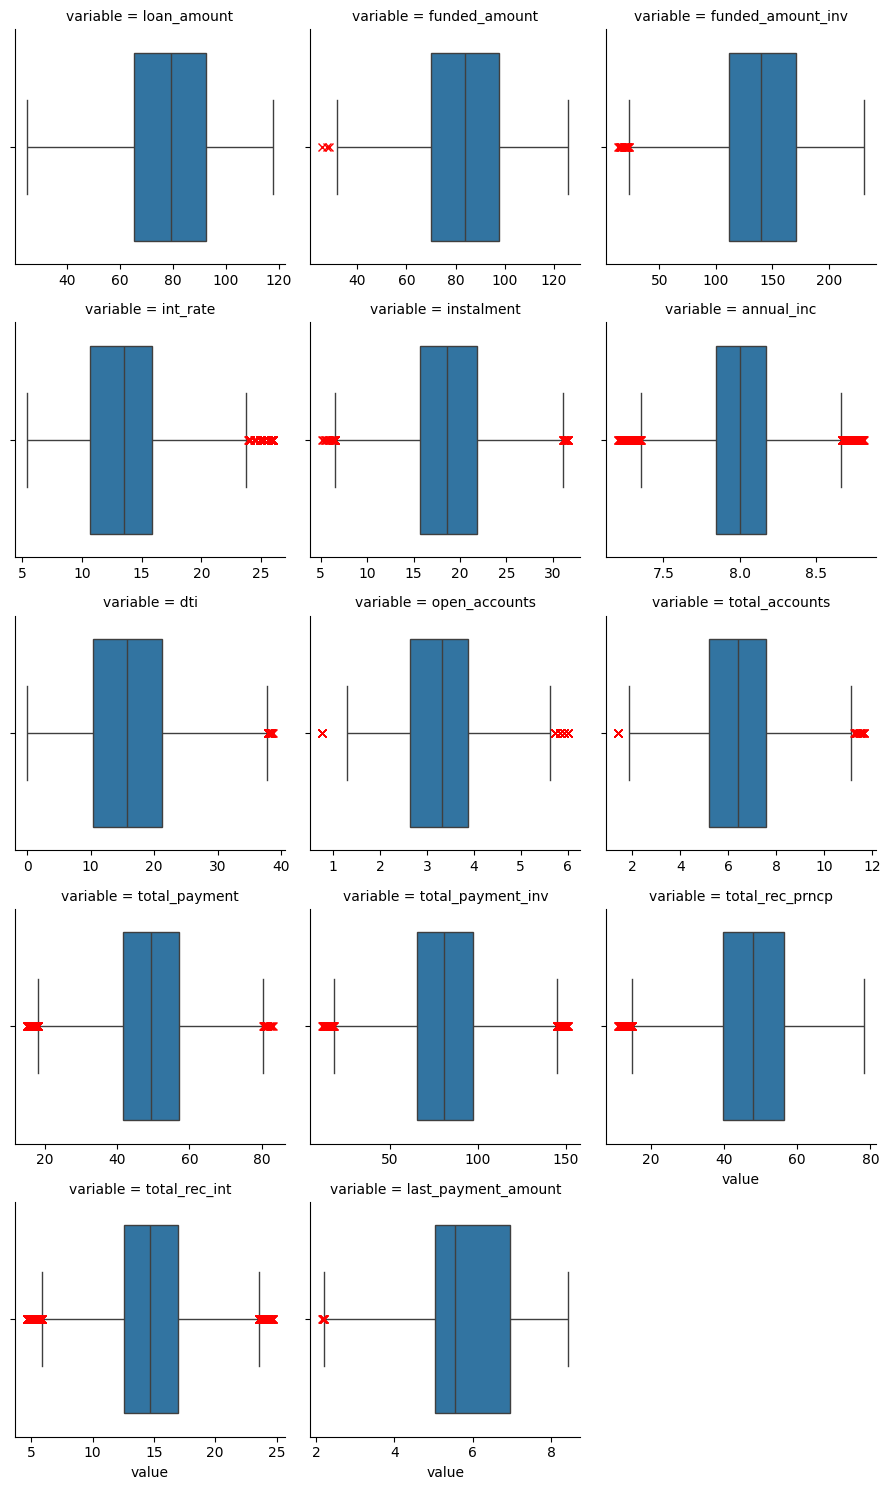

In [36]:
plot.facet_grid_box_plot(df, normal_cols) # visualise again to see the changes made

In [37]:
df_outlier_remove = df.copy() # save a copy of this tranformed dataframe

-------------------------

### Analysis and Visualisation

Please go to `analysis_and_visualisation.ipynb` notebook for remaining analysis where we will dive deeper into the dataset to identify patterns and trends for the loans dataset

In [38]:
# save a copy of the cleaned dataset for use in the next notebook
with open('loan_payments_cleaned.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8', index= False)